In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# To read directly the CSV from the John Hopkins github repo
import io
import requests

# Set seaborn style and fonts
sns.set_style("whitegrid")
sns.set(font_scale=3, rc={'lines.linewidth': 3})

In [4]:
# Obtain the data from the John Hopkins github repo
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
s = requests.get(url).content

# df = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Columns: 185 entries, UID to 7/13/20
dtypes: float64(3), int64(176), object(6)
memory usage: 4.6+ MB


In [6]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,280,280,301,303,307,309,310,310,310,312
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,31,31,31,31,31,31,31,33,33,33
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,7787,7916,8585,8714,8745,8862,9137,9366,9654,10010
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,111,111,112,116,122,144,153,167,181,206


## Exploratory Data Analysis for Los Angeles

In [7]:
'Raleigh' in set(df['Admin2'])
df[df['Admin2']=='Wake']
# df[df['Province_State']=='North Carolina'].tail(n=20)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
1986,84037183,US,USA,840,37183.0,Wake,North Carolina,US,35.788793,-78.652492,...,5810,5980,6231,6299,6471,6704,7065,7204,7447,7668


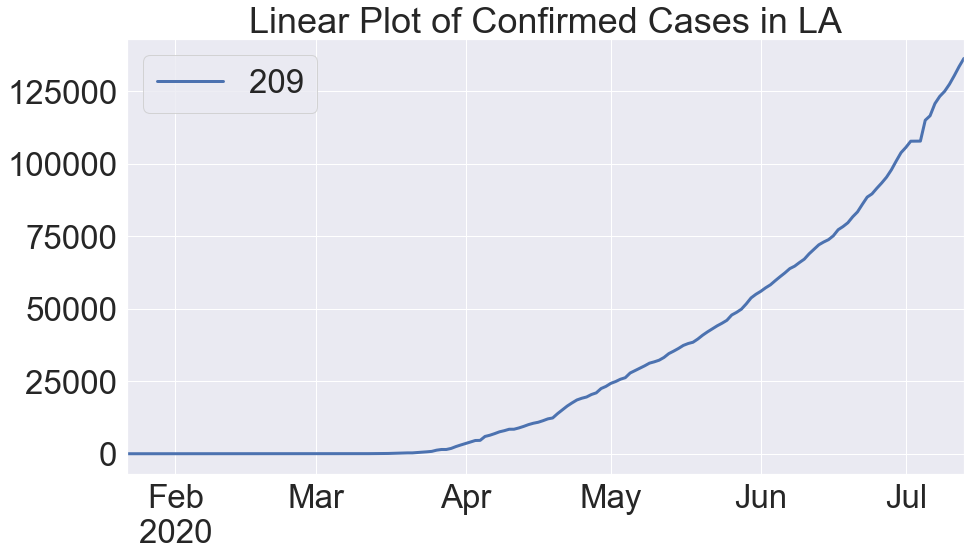

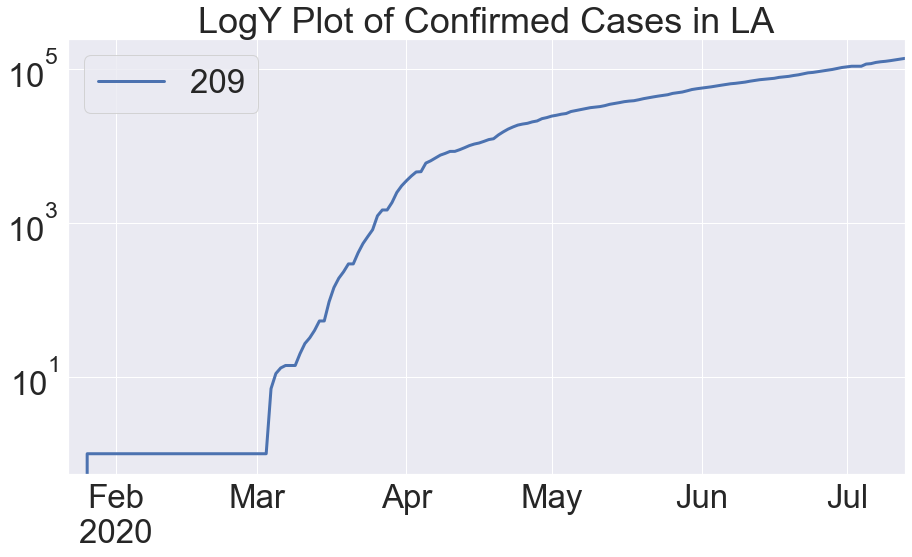

In [8]:
# df_LA = df[df['Admin2']=='Wake']
df_LA = df[df['Admin2']=='Los Angeles']
df_LA = df_LA.transpose()
df_LA = df_LA.drop(labels=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
df_LA.index = pd.to_datetime(df_LA.index)
df_LA.head()

fig1 = df_LA.plot(figsize=(15,8), title='Linear Plot of Confirmed Cases in LA', kind='line')

fig2 = df_LA.plot(figsize=(15,8), logy=True, title='LogY Plot of Confirmed Cases in LA')

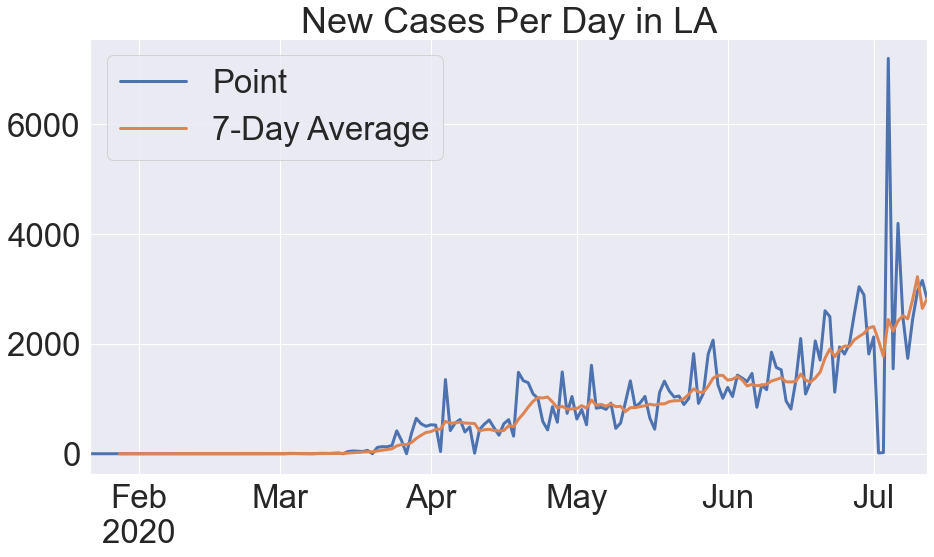

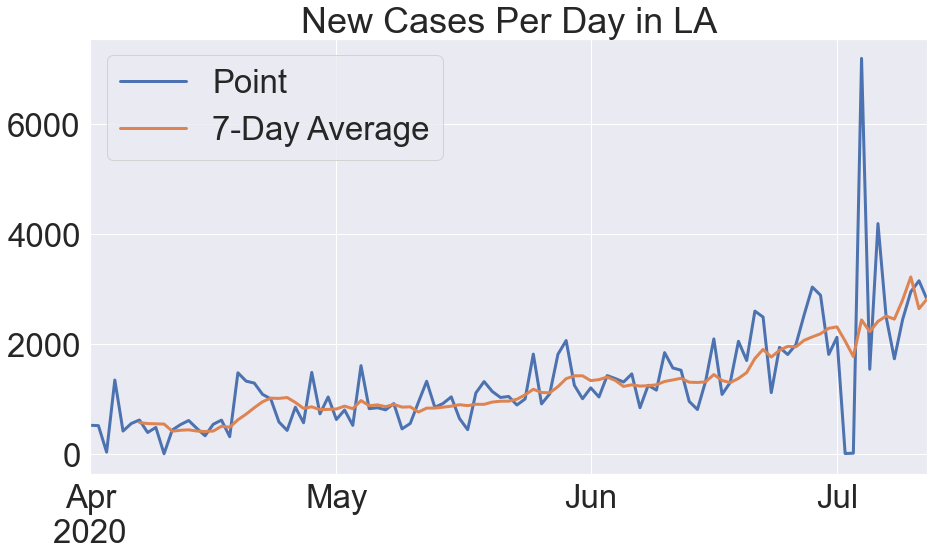

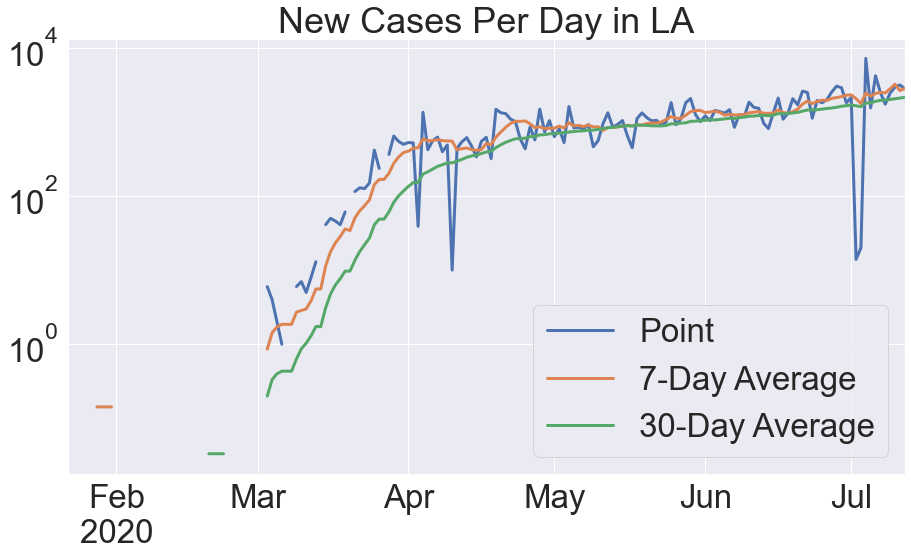

In [9]:
df_newcases_LA = df_LA[1:].values-df_LA[0:-1]
fig3 = df_newcases_LA.rename(columns={209: 'Point'}).plot(kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig3 = df_newcases_LA.rolling(window=7).mean().rename(columns={209: '7-Day Average'}).plot(ax=fig3)

fig5 = df_newcases_LA[df_newcases_LA.index>pd.to_datetime('03-31-20')].rename(columns={209: 'Point'}).plot(kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig5 = df_newcases_LA[df_newcases_LA.index>pd.to_datetime('03-31-20')].rolling(window=7).mean().rename(columns={209: '7-Day Average'}).plot(ax=fig5)


# Drop the ones that have zeros to avoid problems in the log plot
indexVal = df_newcases_LA[ df_newcases_LA.values == 0 ].index
df_newcases_LA_tmp1 = df_newcases_LA.copy()
df_newcases_LA_tmp1.loc[indexVal] = np.NaN

df_newcases_LA_tmp2 = df_newcases_LA.rolling(window=7).mean()
indexVal = df_newcases_LA_tmp2[ df_newcases_LA_tmp2.values == 0 ].index
df_newcases_LA_tmp2.loc[indexVal] = np.NaN

df_newcases_LA_tmp3 = df_newcases_LA.rolling(window=30).mean()
indexVal = df_newcases_LA_tmp2[ df_newcases_LA_tmp3.values == 0 ].index
df_newcases_LA_tmp3.loc[indexVal] = np.NaN

fig4 = df_newcases_LA_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig4 = df_newcases_LA_tmp2.rename(columns={209: '7-Day Average'}).plot(logy=True, ax=fig4)
fig4 = df_newcases_LA_tmp3.rename(columns={209: '30-Day Average'}).plot(logy=True, ax=fig4)

## Exploratory Data Analysis by State

In [10]:
df_state = df.drop(labels=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).groupby(['Province_State']).sum()
df_state = df_state.transpose()
df_state.index = pd.to_datetime(df_state.index)
df_state.tail()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-07-09,49174,1268,0,112671,26052,302484,35507,47209,12531,49,...,57591,236541,27356,1272,144,67988,38581,3826,33908,1769
2020-07-10,50508,1323,0,116892,26803,310885,36173,47287,12652,49,...,59546,244756,28223,1277,153,68931,39218,3983,34753,1790
2020-07-11,51947,1385,0,119930,27864,318761,36573,47287,12743,49,...,61006,254415,28855,1283,167,69782,39218,4146,35679,1839
2020-07-12,53587,1479,0,122467,28367,324543,36895,47287,12804,49,...,61960,262762,29484,1296,181,70670,40656,4244,36448,1862
2020-07-13,55545,1539,0,123824,28939,333357,37218,47510,12879,49,...,65274,269778,30030,1301,206,71642,40656,4313,36942,1903


In [15]:
col_drop = df_state.columns[df_state.values[-1][:] < 100_000]
df_state = df_state.drop(columns=col_drop, axis=1)

df_state.tail()

Province_State,Arizona,California,Florida,Georgia,Illinois,Massachusetts,New Jersey,New York,Pennsylvania,Texas
2020-07-09,112671,302484,232718,106727,151572,110897,174270,399513,97542,236541
2020-07-10,116892,310885,244151,111217,152899,111110,174628,400299,98482,244756
2020-07-11,119930,318761,254511,114401,154094,111398,174959,401029,99216,254415
2020-07-12,122467,324543,269811,116935,155048,111597,175298,401706,99794,262762
2020-07-13,123824,333357,282435,120572,155931,111827,175522,402263,100330,269778


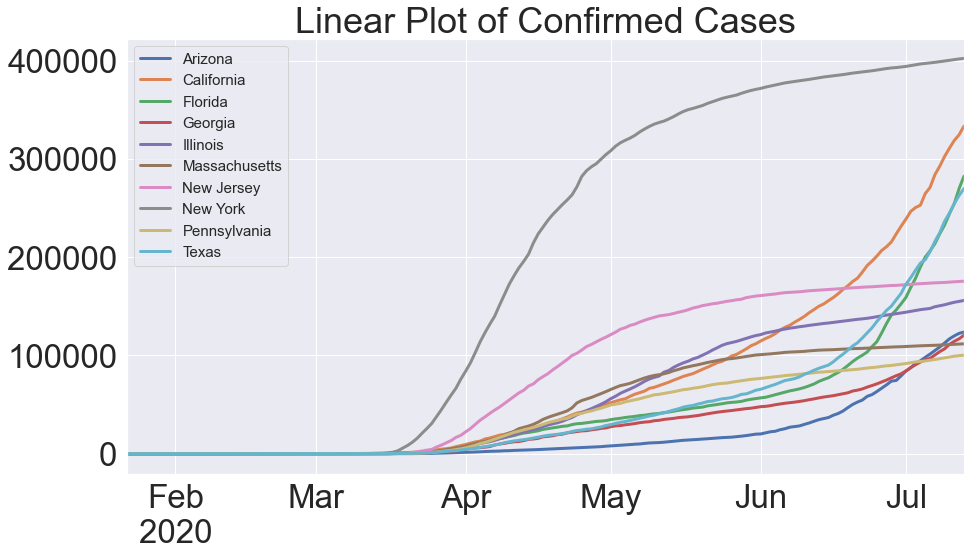

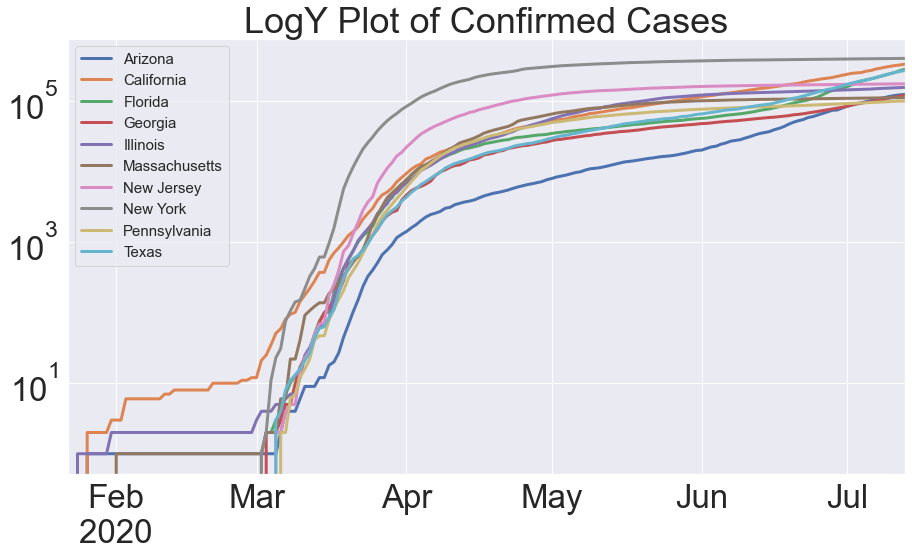

In [16]:
fig1 = df_state.plot(figsize=(15,8), title='Linear Plot of Confirmed Cases', kind='line')
plt.legend(fontsize=15);
fig2 = df_state.plot(figsize=(15,8), logy=True, title='LogY Plot of Confirmed Cases')
plt.legend(fontsize=15);

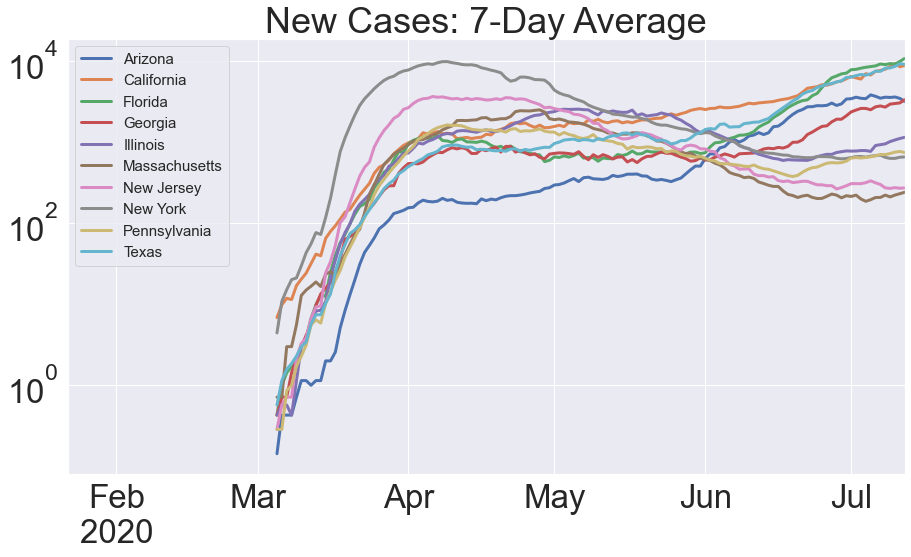

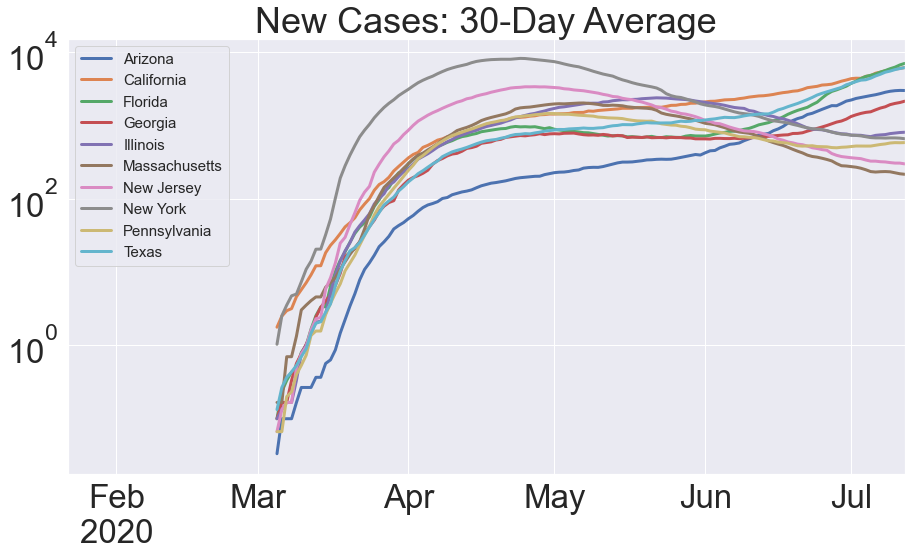

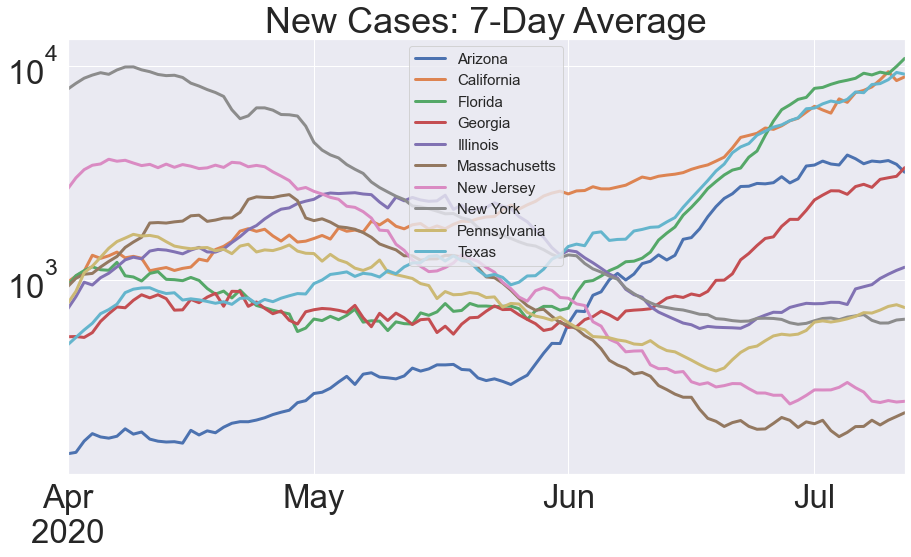

In [18]:
df_newcases_state = df_state[1:].values-df_state[0:-1]

# Drop the ones that have zeros to avoid problems in the log plot
indexVal = df_newcases_state[ df_newcases_state.values == 0 ].index
df_newcases_state_tmp1 = df_newcases_state.copy()
df_newcases_state_tmp1.loc[indexVal] = np.NaN

df_newcases_state_tmp2 = df_newcases_state.rolling(window=7).mean()
indexVal = df_newcases_state_tmp2[ df_newcases_state_tmp2.values == 0 ].index
df_newcases_state_tmp2.loc[indexVal] = np.NaN

df_newcases_state_tmp3 = df_newcases_state.rolling(window=30).mean()
indexVal = df_newcases_state_tmp2[ df_newcases_state_tmp3.values == 0 ].index
df_newcases_state_tmp3.loc[indexVal] = np.NaN

# fig4 = df_newcases_state_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in state')
fig4 = df_newcases_state_tmp2.plot(logy=True, figsize=(15,8), title='New Cases: 7-Day Average')
plt.legend(fontsize=15);
fig5 = df_newcases_state_tmp3.plot(logy=True, figsize=(15,8), title='New Cases: 30-Day Average')
plt.legend(fontsize=15);

# fig4 = df_newcases_state_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in state')
fig4 = df_newcases_state_tmp2[df_newcases_state_tmp2.index>pd.to_datetime('03-31-20')].plot(logy=True, figsize=(15,8), title='New Cases: 7-Day Average')
plt.legend(fontsize=15);